<a href="https://colab.research.google.com/github/Abha2003/Audio_Classifier/blob/main/Audio_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD DEPENDENCIES


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
!pip install tensorflow-io # install the missing module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.3 MB/s eta 0:00:00


In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


3. DEFINE PATH TO FILES

In [5]:
CAPUCHIN_FILE = os.path.join('data1', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data1', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [6]:
CAPUCHIN_FILE

'data1/Parsed_Capuchinbird_Clips/XC3776-3.wav'

In [ ]:
NOT_CAPUCHIN_FILE

'data1/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. BUILD DATALOADING FUNCTION

In [ ]:
!ls /content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips

XC114131-0.wav	XC178168-2.wav	 XC216012-13.wav  XC227468-0.wav  XC27882-1.wav    XC433953-1.wav
XC114131-1.wav	XC178168-3.wav	 XC216012-14.wav  XC227468-1.wav  XC27882-2.wav    XC433953-2.wav
XC114131-2.wav	XC178168-4.wav	 XC216012-15.wav  XC227468-2.wav  XC27882-4.wav    XC433953-3.wav
XC114131-3.wav	XC178168-5.wav	 XC216012-16.wav  XC227468-3.wav  XC27882-5.wav    XC433953-4.wav
XC114131-4.wav	XC178168-6.wav	 XC216012-17.wav  XC227468-4.wav  XC27882-6.wav    XC433953-6.wav
XC114132-0.wav	XC178168-7.wav	 XC216012-18.wav  XC227468-5.wav  XC307385-0.wav   XC495697-1.wav
XC114132-1.wav	XC201990-1.wav	 XC216012-19.wav  XC227469-0.wav  XC307385-1.wav   XC495697-2.wav
XC114132-2.wav	XC201990-2.wav	 XC216012-1.wav   XC227469-1.wav  XC307385-2.wav   XC495697-3.wav
XC114132-3.wav	XC201990-3.wav	 XC216012-2.wav   XC227469-2.wav  XC307385-3.wav   XC495697-4.wav
XC114132-5.wav	XC201990-4.wav	 XC216012-4.wav   XC227469-3.wav  XC307385-4.wav   XC513083-0.wav
XC114132-6.wav	XC201990-5.wav	 XC216012-

In [ ]:
 def load_wav_16k_mono(filename):
  file_contents = tf.io.read_file(filename)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [ ]:
!ls /content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips/XC3776-3.wav
CAPUCHIN_FILE = '/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips/XC3776-3.wav'
file_contents = tf.io.read_file(CAPUCHIN_FILE)


/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips/XC3776-3.wav


In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [ ]:
len(wav)

132300

In [ ]:
wav = tfio.audio.resample(tf.squeeze(wav), rate_in=44100, rate_out=16000)

In [ ]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [ ]:
!ls /content/drive/MyDrive/data1/Parsed_Not_Capuchinbird_Clips

afternoon-birds-song-in-forest-0.wav	 crickets-sound-effect-26.wav
afternoon-birds-song-in-forest-10.wav	 crickets-sound-effect-27.wav
afternoon-birds-song-in-forest-12.wav	 crickets-sound-effect-28.wav
afternoon-birds-song-in-forest-13.wav	 crickets-sound-effect-29.wav
afternoon-birds-song-in-forest-14.wav	 crickets-sound-effect-30.wav
afternoon-birds-song-in-forest-15.wav	 crickets-sound-effect-31.wav
afternoon-birds-song-in-forest-16.wav	 crickets-sound-effect-6.wav
afternoon-birds-song-in-forest-17.wav	 crickets-sound-effect-7.wav
afternoon-birds-song-in-forest-18.wav	 crickets-sound-effect-8.wav
afternoon-birds-song-in-forest-19.wav	 crickets-sound-effect-9.wav
afternoon-birds-song-in-forest-1.wav	 crow-cawing-sound-effect-10.wav
afternoon-birds-song-in-forest-20.wav	 crow-cawing-sound-effect-4.wav
afternoon-birds-song-in-forest-21.wav	 crow-cawing-sound-effect-5.wav
afternoon-birds-song-in-forest-22.wav	 crow-cawing-sound-effect-6.wav
afternoon-birds-song-in-forest-23.wav	 crow-c

In [ ]:
!ls /content/drive/MyDrive/data1/Parsed_Not_Capuchinbird_Clips
NOT_CAPUCHIN_FILE = '/content/drive/MyDrive/data1/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'
file_contents = tf.io.read_file(NOT_CAPUCHIN_FILE)

afternoon-birds-song-in-forest-0.wav	 crickets-sound-effect-26.wav
afternoon-birds-song-in-forest-10.wav	 crickets-sound-effect-27.wav
afternoon-birds-song-in-forest-12.wav	 crickets-sound-effect-28.wav
afternoon-birds-song-in-forest-13.wav	 crickets-sound-effect-29.wav
afternoon-birds-song-in-forest-14.wav	 crickets-sound-effect-30.wav
afternoon-birds-song-in-forest-15.wav	 crickets-sound-effect-31.wav
afternoon-birds-song-in-forest-16.wav	 crickets-sound-effect-6.wav
afternoon-birds-song-in-forest-17.wav	 crickets-sound-effect-7.wav
afternoon-birds-song-in-forest-18.wav	 crickets-sound-effect-8.wav
afternoon-birds-song-in-forest-19.wav	 crickets-sound-effect-9.wav
afternoon-birds-song-in-forest-1.wav	 crow-cawing-sound-effect-10.wav
afternoon-birds-song-in-forest-20.wav	 crow-cawing-sound-effect-4.wav
afternoon-birds-song-in-forest-21.wav	 crow-cawing-sound-effect-5.wav
afternoon-birds-song-in-forest-22.wav	 crow-cawing-sound-effect-6.wav
afternoon-birds-song-in-forest-23.wav	 crow-c

In [ ]:
file_contents = tf.io.read_file(NOT_CAPUCHIN_FILE)

In [ ]:
nwav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
nwav

<tf.Tensor: shape=(134857, 1), dtype=float32, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.00372314],
       [0.0057373 ],
       [0.00540161]], dtype=float32)>

In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [ ]:
nwav = tfio.audio.resample(tf.squeeze(wav), rate_in=44100, rate_out=16000) # Add tf.squeeze to remove the extra dimension.

In [ ]:
nwav

<tf.Tensor: shape=(17414,), dtype=float32, numpy=
array([-7.2713007e-12, -4.0932736e-11,  3.8021593e-11, ...,
        1.2306536e-02,  8.3452072e-03,  2.0032967e-03], dtype=float32)>

5. PLOT WAVE

In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

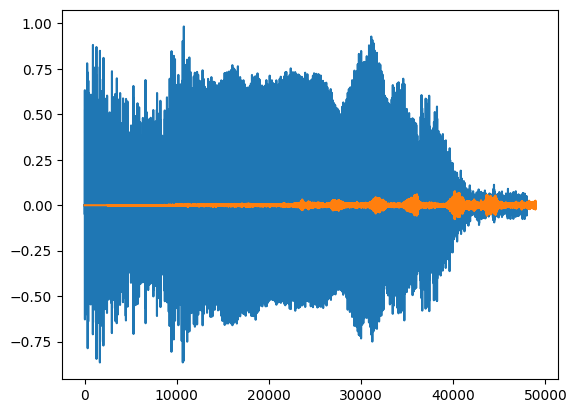

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()










6. CREATE TENSORFLOW DATASET

In [ ]:
POS = os.path.join('data1', '/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips')
NEG = os.path.join('data1', '/content/drive/MyDrive/data1/Parsed_Not_Capuchinbird_Clips')

In [ ]:
POS

'/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips'

In [ ]:
NEG

'/content/drive/MyDrive/data1/Parsed_Not_Capuchinbird_Clips'

In [ ]:

!ls {POS}
!ls {NEG}

XC114131-0.wav	XC178168-2.wav	 XC216012-13.wav  XC227468-0.wav  XC27882-1.wav    XC433953-1.wav
XC114131-1.wav	XC178168-3.wav	 XC216012-14.wav  XC227468-1.wav  XC27882-2.wav    XC433953-2.wav
XC114131-2.wav	XC178168-4.wav	 XC216012-15.wav  XC227468-2.wav  XC27882-4.wav    XC433953-3.wav
XC114131-3.wav	XC178168-5.wav	 XC216012-16.wav  XC227468-3.wav  XC27882-5.wav    XC433953-4.wav
XC114131-4.wav	XC178168-6.wav	 XC216012-17.wav  XC227468-4.wav  XC27882-6.wav    XC433953-6.wav
XC114132-0.wav	XC178168-7.wav	 XC216012-18.wav  XC227468-5.wav  XC307385-0.wav   XC495697-1.wav
XC114132-1.wav	XC201990-1.wav	 XC216012-19.wav  XC227469-0.wav  XC307385-1.wav   XC495697-2.wav
XC114132-2.wav	XC201990-2.wav	 XC216012-1.wav   XC227469-1.wav  XC307385-2.wav   XC495697-3.wav
XC114132-3.wav	XC201990-3.wav	 XC216012-2.wav   XC227469-2.wav  XC307385-3.wav   XC495697-4.wav
XC114132-5.wav	XC201990-4.wav	 XC216012-4.wav   XC227469-3.wav  XC307385-4.wav   XC513083-0.wav
XC114132-6.wav	XC201990-5.wav	 XC216012-

In [ ]:
pos = tf.data.Dataset.list_files(POS + '/*-*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*-*.wav')

In [ ]:
pos.as_numpy_iterator().next()

b'/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips/XC114132-2.wav'

In [ ]:
tf.ones(len(pos))

<tf.Tensor: shape=(137,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)>

Add labels and combine positive and negative samples

In [ ]:
tf.zeros(len(neg))

<tf.Tensor: shape=(361,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips/XC227468-2.wav', 1.0)

In [ ]:
data.shuffle(1000).as_numpy_iterator().next

<bound method NumpyIterator.next of NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x79373baf7640>)>

Determine Average Length of a capuchin call

In [ ]:
import os
lengths = []
# Check if directory exists
if os.path.exists(os.path.join('data','/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips')):
    for file in os.listdir(os.path.join('data','/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips')):
        # Make sure to include the file name when loading the wav file
        tensor_wave = load_wav_16k_mono(os.path.join('data','/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips',file))
        lengths.append(len(tensor_wave))
else:
    # Handle the case where directory doesn't exist
    print("Directory not found: '/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips'")

In [ ]:
os.listdir(os.path.join('data','/content/drive/MyDrive/data1/Parsed_Capuchinbird_Clips'))

['XC168899-0.wav',
 'XC16803-0.wav',
 'XC114132-5.wav',
 'XC114132-3.wav',
 'XC114131-4.wav',
 'XC114132-6.wav',
 'XC114131-3.wav',
 'XC16803-2.wav',
 'XC16803-1.wav',
 'XC114132-1.wav',
 'XC119294-0.wav',
 'XC114132-2.wav',
 'XC114132-0.wav',
 'XC16804-1.wav',
 'XC114131-2.wav',
 'XC178167-0.wav',
 'XC216010-2.wav',
 'XC178168-3.wav',
 'XC201990-2.wav',
 'XC216010-3.wav',
 'XC178168-7.wav',
 'XC178168-1.wav',
 'XC178167-1.wav',
 'XC178168-2.wav',
 'XC201990-5.wav',
 'XC178168-0.wav',
 'XC178168-4.wav',
 'XC178168-5.wav',
 'XC178167-2.wav',
 'XC178167-3.wav',
 'XC201990-1.wav',
 'XC216010-4.wav',
 'XC216010-1.wav',
 'XC201990-3.wav',
 'XC216010-0.wav',
 'XC178168-6.wav',
 'XC201990-4.wav',
 'XC216012-5.wav',
 'XC216012-2.wav',
 'XC216012-1.wav',
 'XC216012-11.wav',
 'XC216012-7.wav',
 'XC216012-4.wav',
 'XC216012-16.wav',
 'XC216012-13.wav',
 'XC216012-6.wav',
 'XC216012-19.wav',
 'XC216012-14.wav',
 'XC216012-10.wav',
 'XC216010-7.wav',
 'XC216012-18.wav',
 'XC216012-12.wav',
 'XC2160

In [ ]:
lengths

[64000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 64000,
 40000,
 64000,
 64000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 64000,
 56000,
 56000,
 48000,
 56000,
 56000,
 48000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 32000,
 40000,
 48000,
 40000,
 48000,
 56000,
 48000,
 48000,
 56000,
 56000,
 56000,
 40000,
 48000,
 40000,
 48000,
 64000,
 64000,
 48000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 48000,
 56000,
 40000,
 64000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 72000,
 56000,
 64000,
 48000,
 48000,
 64000,
 64000,
 48000,
 56000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 40000,
 64000,
 64000,
 48000,
 64000,
 64000,
 64000,
 56000,
 48000,
 64000,
 48000,
 56000,
 55999,
 64000,
 55999,
 48000,
 48000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 40000,
 56000,
 64000,
 64000,


 calculate mean, min  and max

In [ ]:
54582/16000

3.411375

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54364>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=72000>

build Preprocessing Function

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [ ]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav],0)

In [ ]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=complex64, numpy=
array([[ 7.2591394e-02+0.0000000e+00j,  6.7992195e-02-2.0559762e-02j,
         5.4970033e-02-4.2972922e-02j, ...,
        -1.3107248e-04+4.5731105e-04j,  2.2325665e-04+1.0497123e-04j,
         7.3611736e-06+0.0000000e+00j],
       [-3.5664439e-03+0.0000000e+00j, -9.6119894e-04-2.4884965e-04j,
        -4.2072926e-03-3.8318178e-03j, ...,
         2.8380915e-04+2.6447803e-04j,  1.1922186e-04-1.5517350e-04j,
        -3.3080578e-05+0.0000000e+00j],
       [-3.7607998e-03+0.0000000e+00j,  2.3713058e-03+1.3893442e-03j,
         4.9793569e-04-3.5142400e-03j, ...,
         3.0914476e-04-9.1413385e-05j, -1.4053122e-04-1.7673807e-04j,
        -4.4688582e-05+0.0000000e+00j],
       ...,
       [ 5.8630481e-03+0.0000000e+00j,  7.2082115e-04-8.8769738e-03j,
        -1.4671192e-02+3.1971398e-03j, ...,
        -5.5813976e-04+5.6765112e-04j,  3.2898056e-04+4.9715396e-05j,
        -1.2891740e-04+0.0000000e+00j],
       [ 3.7055314e-03+0.0000000e+00j

Test out the function and viz spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

In [ ]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.4572836e-02],
        [1.4680847e-02],
        [1.7477231e-02],
        ...,
        [8.2882550e-05],
        [6.7904162e-05],
        [1.7605722e-05]],

       [[2.4989322e-02],
        [2.5006106e-02],
        [1.7421948e-02],
        ...,
        [8.6531443e-05],
        [6.3817257e-05],
        [2.9578805e-05]],

       [[3.9181456e-02],
        [3.3695988e-02],
        [1.8238856e-02],
        ...,
        [1.1097966e-04],
        [6.4070176e-05],
        [4.0873885e-05]],

       ...,

       [[2.6167430e-02],
        [2.6340226e-02],
        [2.0124329e-02],
        ...,
        [2.5336654e-04],
        [9.1578411e-05],
        [9.8489225e-05]],

       [[1.1437938e-02],
        [1.8734826e-02],
        [1.7960437e-02],
        ...,
        [2.2522990e-04],
        [6.5367793e-05],
        [1.1189282e-04]],

       [[3.3173859e-03],
        [1.5963517e-02],
        [1.6169813e-02],
        ...,
        [1.5695702

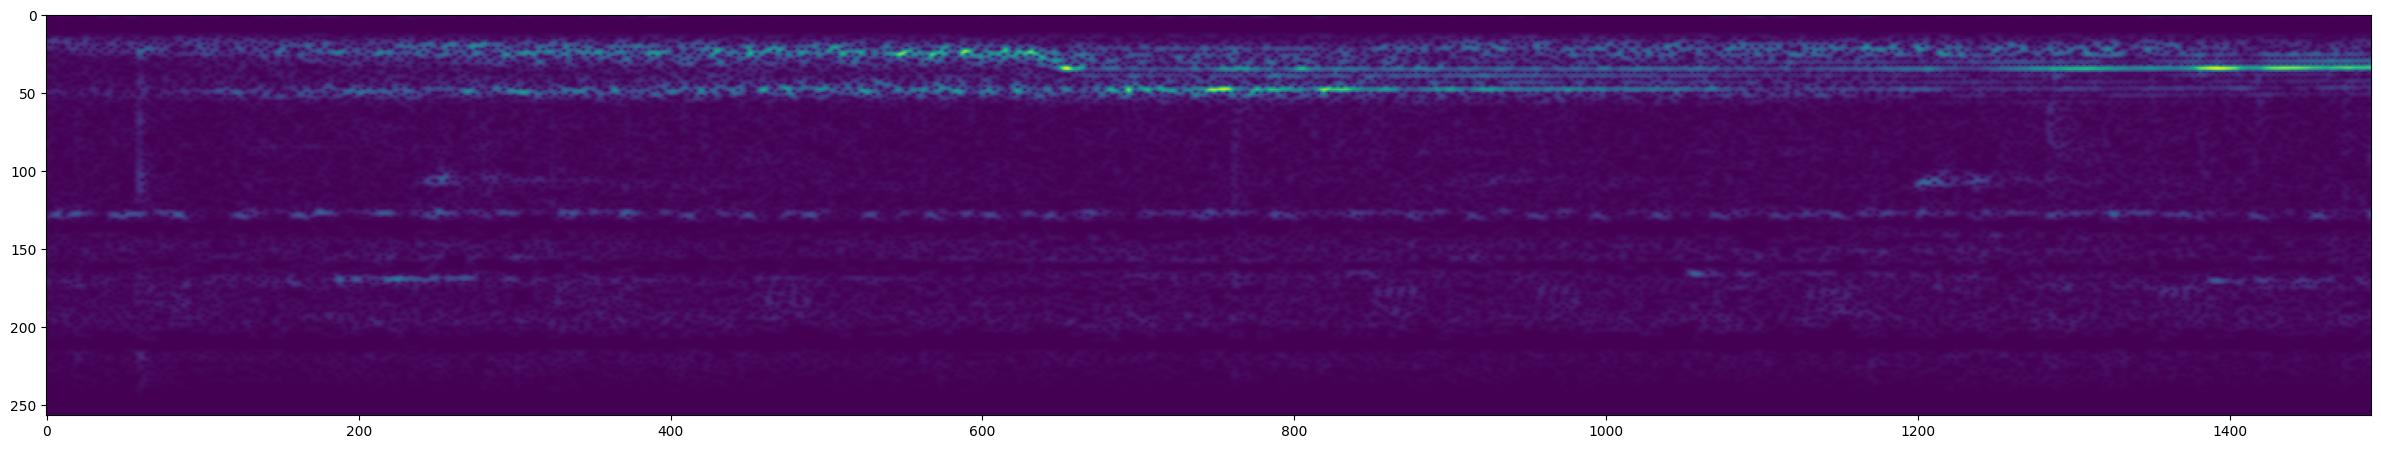

In [ ]:
plt.figure(figsize=(30,10))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()


# Creating Training and Testing Partisions


In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size = 1000)
data = data.batch(16)
data = data.prefetch(8)

In [ ]:
len(data)*.7

22.4

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

In [ ]:
import numpy as np  # Make sure NumPy is imported
train_data = []
for batch in train:  # Use the correct variable 'train' instead of 'train_dataset'
    # Since batch[0] is already a numpy array, simply extend with it
    train_data.extend(batch[0])

# Convert the list to a NumPy array
train_numpy = np.array(train_data, dtype=np.float32)  # Use a different variable name, like 'train_numpy'

# Assuming 'test' is a TensorFlow Dataset, convert it to a NumPy array
test_numpy = np.array([x.numpy() for x in test.as_numpy_iterator()], dtype=np.float32)  # Use a different variable name, like 'test_numpy'


print("Train shape:", train_numpy.shape)  # Use the new variable name
print("Test shape:", test_numpy.shape)  # Use the new variable name

KeyboardInterrupt: 

In [ ]:
train_data = []
for batch in train:
    train_data.extend(batch[0])
train_numpy = np.array(train_data, dtype=np.float32)

In [ ]:
train_numpy.shape

(498, 1491, 257, 1)

Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout,BatchNormalization

Build Sequential Model, Compile and View Summary
\

In [ ]:
!pip install tensorflow # install tensorflow
from tensorflow.keras.models import Sequential # import Sequential class from tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout,BatchNormalization # import Conv2D
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(1491,257,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])


In [ ]:
model.summary()

 Fit Model, View Loss and KPl Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

In [ ]:

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

# Assuming 'data' is a tf.data.Dataset
train = data.take(36)
test = data.skip(36).take(15)

# Convert the datasets to numpy arrays
train_list = list(train.as_numpy_iterator())
test_list = list(test.as_numpy_iterator())

# Check the lengths of train_list and test_list
print(f"Length of train_list: {len(train_list)}")
print(f"Length of test_list: {len(test_list)}")

# Check the structure of elements in train_list and test_list (if not empty)
if train_list:
    # Print the shape of the first element's data part (assuming it's an image)
    print(f"Structure of first element in train_list: {type(train_list[0])}, data shape: {np.shape(train_list[0][0])}")
if test_list:
    # Print the shape of the first element's data part (assuming it's an image)
    print(f"Structure of first element in test_list: {type(test_list[0])}, data shape: {np.shape(test_list[0].data)}")

# **Fix:** Pad the sequences to ensure consistent shapes
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = [item[0] for item in train_list]
X_train = pad_sequences(X_train, padding='post')  # Pad sequences to a uniform length

y_train = np.array([item[1] for item in train_list])

X_test = [item[0] for item in test_list]
X_test = pad_sequences(X_test, padding='post')  # Pad sequences to a uniform length

y_test = np.array([item[1] for item in test_list])

# Reshape the input data to match the model's expected input shape
# Assuming input_shape is (128, 128, 1)
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# One-hot encode the labels if necessary
# Assuming 'num_classes' is the number of classes in your dataset
num_classes = 10  # Replace with your actual number of classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Now you can use X_train, y_train, X_test, and y_test in model.fit()

In [ ]:
!pip install tensorflow # install tensorflow
from tensorflow.keras.models import Sequential # import Sequential class from tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout,BatchNormalization # import Conv2D
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(1491,257,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])
hist = model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense # Import necessary layers

model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# Assuming 'model' is your Keras model
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])
hist = model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) # Changed Y_train to y_train

In [ ]:
model.evaluate(test)

In [ ]:
# Assuming you want to save and load the model you created
import tensorflow as tf

# ... (Your code for creating and training the model) ...

# Save the model
model.save('model.keras')

# Now, you should be able to load the model
from tensorflow import keras

loaded_model = keras.models.load_model('model.keras')

NameError: name 'hist' is not defined

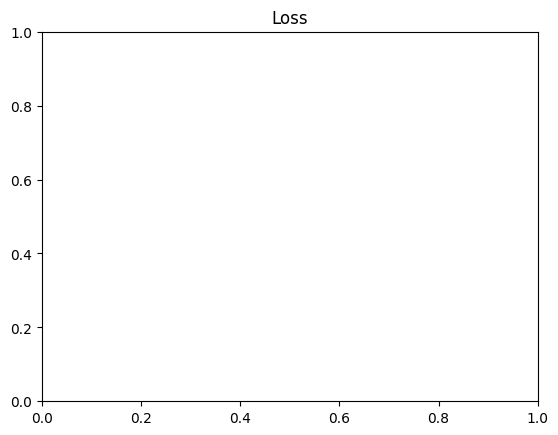

In [ ]:
import matplotlib.pyplot as plt # Make sure you have matplotlib imported

plt.title('Loss')
plt.plot(hist.history['loss'],'r') # Change 'history' to 'hist'
plt.plot(hist.history['val_loss'],'b')
plt.show()

# Make Prediction on single clip

In [ ]:
xtest,ytest = test.as_numpy_iterator().next()

NameError: name 'test' is not defined

In [ ]:
yhat = model.predict(xtest)

NameError: name 'model' is not defined

## Convert Logits to classes

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]



## 9.1 load up mp3s

In [ ]:
yhat = model.predict(xtest)

NameError: name 'xtest' is not defined

In [ ]:

def load_mp3_16k_mono(filename):
    """ Load an MP3 file, convert it to a float tensor, and resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)

    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2

    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)

    # Resample to 16 KHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)

    return wav


In [ ]:
mp3 = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings/recording_00.mp3')


In [ ]:
wav = load_mp3_16k_mono(mp3)

NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN4absl12lts_202308028StatusOrIN3tsl4core11RefCountPtrIS1_EEEEvEE']

In [ ]:
audio_slice = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
sample, index = audio_slice.as_numpy_iterator().next()

## 9.2 Build Function to convert clips into windowed spectrogram

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

# 9.3 convert longer clips into windows and make predictions

In [ ]:
audio_slice = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slice = audio_slice.map(preprocess_mp3)
audio_slice = audio_slice.batch(64)

In [ ]:
yhat = model.predict(audio_slice)
yhat  = [ 1 if prediction > 0.5 else 0 for prediction in yhat]


## 9.4 Group Consenutive Detectons

In [ ]:
from itertools import groupby
yhat = [ key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

# 10 Make Prediction

In [ ]:
results = {}
for file in os.listdir(os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings')):
    FILEPATH = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings',file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    yhat = model.predict(audio_slices)
    results[file] = yhat

## Convert predictions into classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
# class_preds

## 10.3 Group Consective Detections


In [ ]:
postprocessd = {}
for file, scores in class_preds.items():
    postprocessd[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessd

# 11 Export Results

In [ ]:
import csv
with open('results.csv','w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recoding', 'capuchin_calls'])
    for key, value in postprocessd.items():
        writer.writerow([key, value])
